<a href="https://colab.research.google.com/github/samer-glitch/Foundations-of-Trustworthy-AI-A-Comprehensive-Systematic-Review/blob/main/Qualitive_Vs_Quantitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
uploaded = files.upload()

Saving MIAGEScholarResults84selected (version 1).csv to MIAGEScholarResults84selected (version 1) (3).csv


In [37]:
from google.colab import files
uploaded = files.upload()

Saving MIAGEScholarResults480.csv to MIAGEScholarResults480 (1).csv


In [40]:
# Load the CSV files after uploading
df_480 = pd.read_csv('MIAGEScholarResults480 (1).csv', encoding='ISO-8859-1')
df_84 = pd.read_csv('MIAGEScholarResults84selected (version 1) (3).csv', encoding='ISO-8859-1')

# Print and clean up the column names to identify any issues
print("Columns in 480 dataset:", [col for col in df_480.columns])
print("Columns in 84 dataset:", [col for col in df_84.columns])

Columns in 480 dataset: ['Article Identifier', 'year', 'Title']
Columns in 84 dataset: ['Article Id+A1:D68entifier', 'citation', 'Year', 'Title', 'Title.1', 'Robustness', 'Accuracy', 'Fairness', 'Bias Mitigation', 'Acceptance of AI', 'Transparency', 'Explainability', 'Privacy', 'Security', 'Ethical AI', 'Accountability', 'Significance in Trustworthy AI', 'Contributions', 'Outcome']


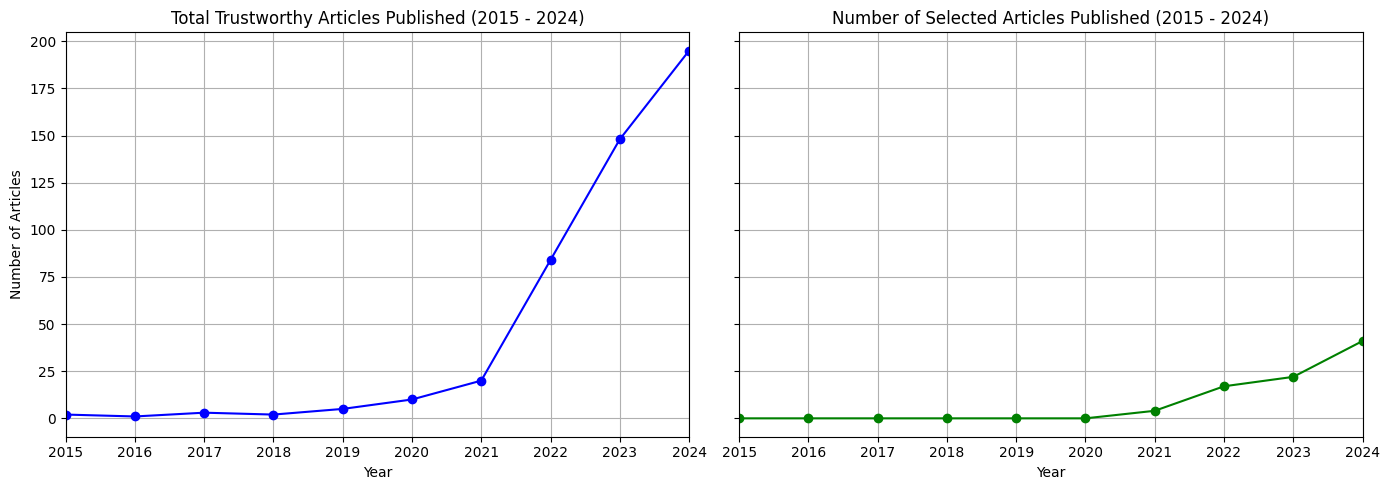

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files after uploading
df_480 = pd.read_csv('MIAGEScholarResults480 (1).csv', encoding='ISO-8859-1')
df_84 = pd.read_csv('MIAGEScholarResults84selected (version 1) (3).csv', encoding='ISO-8859-1')

# Set the year columns after confirming the correct column names
year_column_480 = 'year'   # Column name for year in the 480 dataset
year_column_84 = 'Year'    # Column name for year in the 84 dataset

# Filter out rows where the year is 2025
df_480 = df_480[df_480[year_column_480] != 2025]
df_84 = df_84[df_84[year_column_84] != 2025]

# Count the number of articles per year for both datasets
articles_per_year_480 = df_480[year_column_480].value_counts().sort_index()
articles_per_year_84 = df_84[year_column_84].value_counts().sort_index()

# Define the desired year range for binning (2015 to 2024)
year_range = list(range(2015, 2025))

# Ensure that values for years before 2021 in articles_per_year_84 are set to zero
articles_per_year_84_full = pd.Series(0, index=year_range)  # Create a full series of zeros for all years
articles_per_year_84_full.update(articles_per_year_84)      # Update with the actual values from 2021 onward

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot the total number of trustworthy articles published (480 Articles Dataset)
axes[0].plot(articles_per_year_480.index, articles_per_year_480.values, marker='o', color='blue')
axes[0].set_title('Total Trustworthy Articles Published (2015 - 2024)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Articles')
axes[0].set_xticks(year_range)
axes[0].set_xlim([2015, 2024])
axes[0].grid(True)

# Plot the number of selected articles published per year (84 Selected Articles Dataset)
axes[1].plot(articles_per_year_84_full.index, articles_per_year_84_full.values, marker='o', color='green')
axes[1].set_title('Number of Selected Articles Published (2015 - 2024)')
axes[1].set_xlabel('Year')
axes[1].set_xticks(year_range)
axes[1].set_xlim([2015, 2024])
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


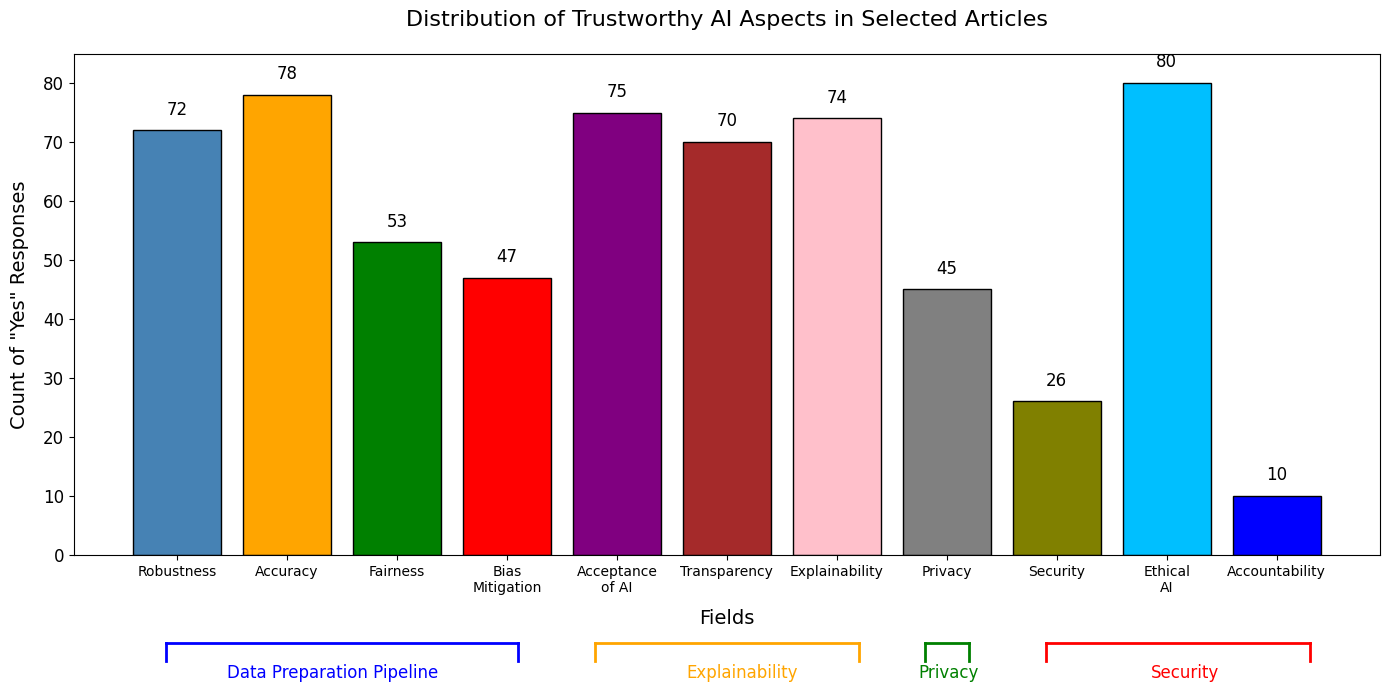

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'MIAGEScholarResults84selected (version 1) (3).csv'
df_84 = pd.read_csv(file_path, encoding='ISO-8859-1')

# Original column names for data selection
columns_of_interest = [
    'Robustness', 'Accuracy', 'Fairness', 'Bias Mitigation', 'Acceptance of AI',
    'Transparency', 'Explainability', 'Privacy', 'Security', 'Ethical AI', 'Accountability'
]

# Display labels for plotting (with line breaks where necessary)
display_labels = [
    'Robustness', 'Accuracy', 'Fairness', 'Bias\nMitigation', 'Acceptance\nof AI',
    'Transparency', 'Explainability', 'Privacy', 'Security', 'Ethical\nAI', 'Accountability'
]

# Calculate the count of 'yes' responses for each column
counts = df_84[columns_of_interest].apply(lambda x: x.str.lower().value_counts().get('yes', 0))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Define the colors to match the reference image
colors = [
    'steelblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'deepskyblue', 'blue'
]

# Create bar chart
bars = ax.bar(display_labels, counts, color=colors, edgecolor='black')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom', fontsize=12)

# Title and axis labels
ax.set_title('Distribution of Trustworthy AI Aspects in Selected Articles', fontsize=16, pad=20)
ax.set_xlabel('Fields', fontsize=14, labelpad=10)
ax.set_ylabel('Count of "Yes" Responses', fontsize=14, labelpad=10)

# Adjust x-axis labels for readability (straight labels with font size adjustment)
plt.xticks(rotation=0, ha='center', fontsize=10)

# Adjust y-axis ticks for consistency
plt.yticks(range(0, 90, 10), fontsize=12)

# Set axis limits to provide similar spacing to reference figure
plt.ylim(0, 85)

# Annotations and Brackets (without bold)
# Data Preparation Pipeline (Robustness, Accuracy, Fairness, Bias Mitigation)
ax.annotate('Data Preparation Pipeline', xy=(1.4, 5), xytext=(1.4, -110),
            textcoords='offset points', ha='center', color='blue', fontsize=12)
ax.plot([-0.1, 3.1], [-15, -15], color='blue', lw=2, clip_on=False)  # Horizontal line
ax.plot([-0.1, -0.1], [-15, -18], color='blue', lw=2, clip_on=False)  # Left tooth
ax.plot([3.1, 3.1], [-15, -18], color='blue', lw=2, clip_on=False)  # Right tooth

# Explainability (Acceptance of AI, Transparency, Explainability)
ax.annotate('Explainability', xy=(5.1, 5), xytext=(3, -110),
            textcoords='offset points', ha='center', color='orange', fontsize=12)
ax.plot([3.8, 6.2], [-15, -15], color='orange', lw=2, clip_on=False)  # Horizontal line
ax.plot([3.8, 3.8], [-15, -18], color='orange', lw=2, clip_on=False)  # Left tooth
ax.plot([6.2, 6.2], [-15, -18], color='orange', lw=2, clip_on=False)  # Right tooth

# Privacy (Privacy)
ax.annotate('Privacy', xy=(7.0, 5), xytext=(1, -110),
            textcoords='offset points', ha='center', color='green', fontsize=12)
ax.plot([6.8, 7.2], [-15, -15], color='green', lw=2, clip_on=False)  # Horizontal line
ax.plot([6.8, 6.8], [-15, -18], color='green', lw=2, clip_on=False)  # Left tooth
ax.plot([7.2, 7.2], [-15, -18], color='green', lw=2, clip_on=False)  # Right tooth

# Security (Security, Ethical AI, Accountability)
ax.annotate('Security', xy=(9.1, 5), xytext=(5, -110),
            textcoords='offset points', ha='center', color='red', fontsize=12)
ax.plot([7.9, 10.3], [-15, -15], color='red', lw=2, clip_on=False)  # Horizontal line
ax.plot([7.9, 7.9], [-15, -18], color='red', lw=2, clip_on=False)  # Left tooth
ax.plot([10.3, 10.3], [-15, -18], color='red', lw=2, clip_on=False)  # Right tooth

# Tighten layout to remove unnecessary spacing
plt.tight_layout()

# Show the plot
plt.show()


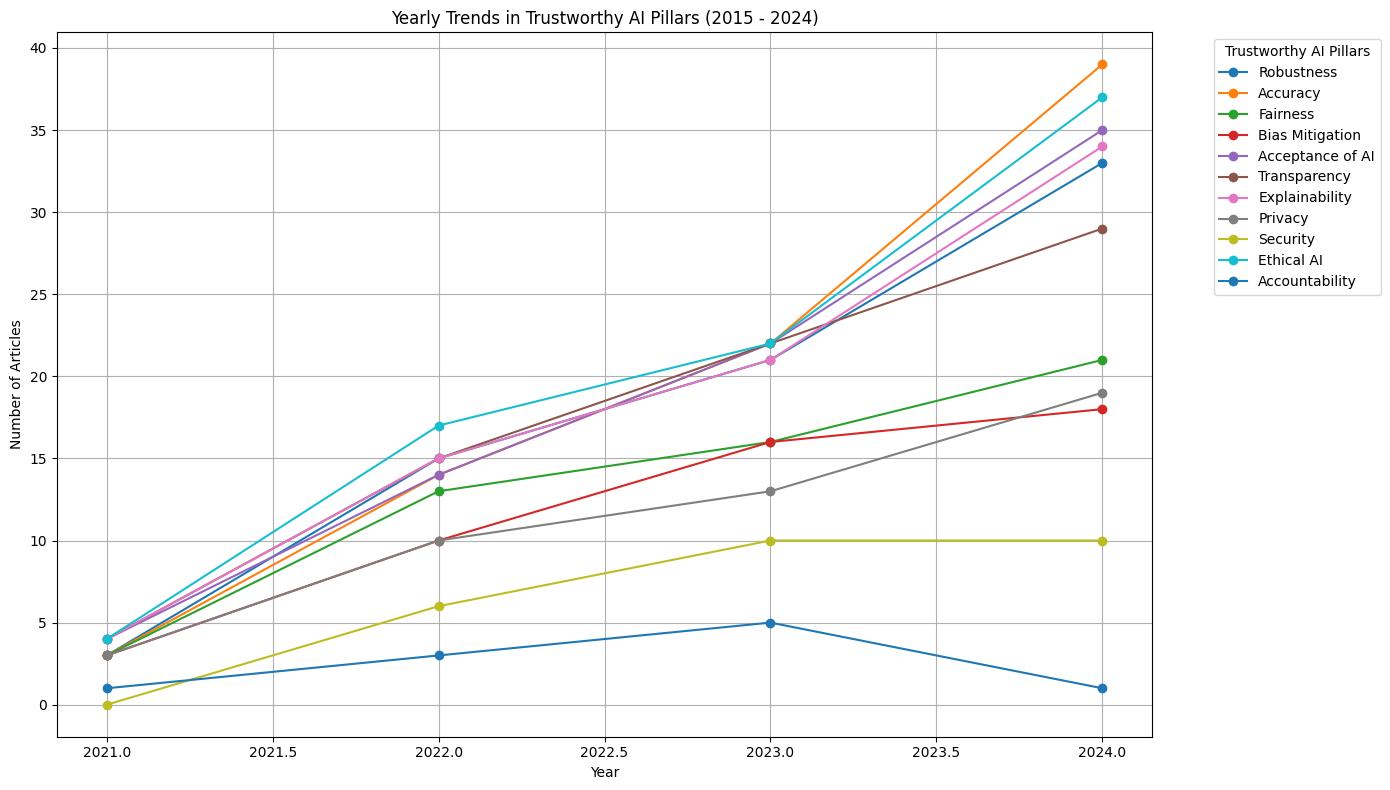

In [100]:
# Using the trustworthy AI dataset (MIAGEScholarResults84selected.csv),
# we'll analyze yearly trends in each trustworthy AI aspect: Robustness, Accuracy, Fairness, Bias Mitigation, Acceptance of AI, etc.

# Selecting only the aspect columns and the Year column for trend analysis
trustworthy_ai_aspects = df_84[['Year', 'Robustness', 'Accuracy', 'Fairness', 'Bias Mitigation',
                                         'Acceptance of AI', 'Transparency', 'Explainability', 'Privacy',
                                         'Security', 'Ethical AI', 'Accountability']]

# For each aspect, count the number of 'yes' responses per year to determine the focus on each aspect over time
aspect_trends = trustworthy_ai_aspects.set_index('Year').apply(lambda col: col.str.lower().eq('yes')).groupby('Year').sum()

# Plotting yearly trends in each trustworthy AI aspect
plt.figure(figsize=(14, 8))
for aspect in aspect_trends.columns:
    plt.plot(aspect_trends.index, aspect_trends[aspect], marker='o', label=aspect)

# Add labels and title
plt.title('Yearly Trends in Trustworthy AI Pillars (2015 - 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title="Trustworthy AI Pillars", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()

Saving MIAGEScholarResults84selected (version 2).csv to MIAGEScholarResults84selected (version 2) (1).csv


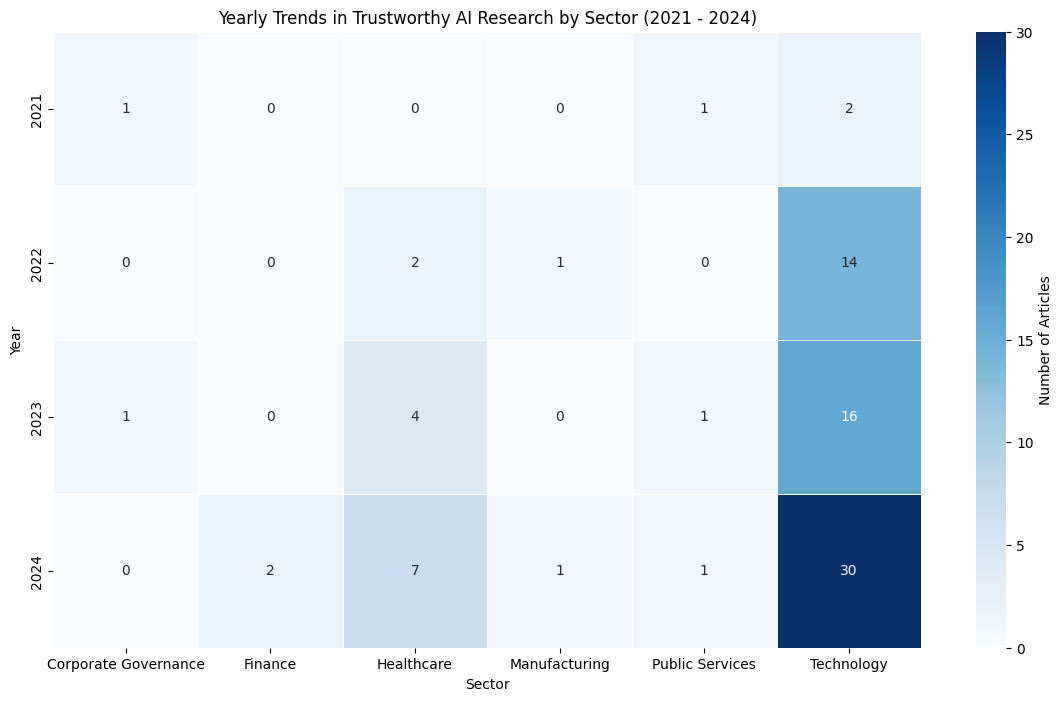

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_480_WithSector = pd.read_csv('MIAGEScholarResults84selected (version 2) (1).csv', encoding='ISO-8859-1')

# Function to categorize each article based on keywords in the title
def categorize_sector(title):
    title = title.lower()
    if any(keyword in title for keyword in ['healthcare', 'medicine', 'medical', 'clinical', 'biomedical']):
        return 'Healthcare'
    elif any(keyword in title for keyword in ['finance', 'credit', 'economic', 'economy']):
        return 'Finance'
    elif any(keyword in title for keyword in ['corporate', 'law', 'governance']):
        return 'Corporate Governance'
    elif any(keyword in title for keyword in ['society', 'social']):
        return 'Public Services'
    elif any(keyword in title for keyword in ['manufacturing', 'construction', 'maintenance']):
        return 'Manufacturing'
    else:
        return 'Technology'

# Apply categorization function to the Title column
df_480_WithSector['Sector'] = df_480_WithSector['Title'].apply(categorize_sector)

# Group by 'Year' and 'Sector' to count articles and unstack for heatmap
yearly_trends_by_sector = df_480_WithSector.groupby(['Year', 'Sector']).size().unstack(fill_value=0)

# Set plot size and create heatmap for yearly trends by sector
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_trends_by_sector, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={'label': 'Number of Articles'})

# Set titles and labels for readability
plt.title('Yearly Trends in Trustworthy AI Research by Sector (2021 - 2024)')
plt.xlabel('Sector')
plt.ylabel('Year')

# Display the plot
plt.show()
